# R和Python的相遇
- **肖凯** 
![alt text](intro.jpg)

## 阵营之争


- Windows vs Linux

- iPhone vs Andriod

- 甜豆花 vs 咸豆花

- R vs Python

## 大纲
- 二种工具的介绍
- 组合R和Python的方式（rpy2）
- 在ipython notebook里使用R
- 一个简单例子

## 两种工具的介绍：共同点
- 均为开源免费
- 均可在三种操作系统中运行
- 均有大量的用户群和社区支持
- 均有大量的扩展包和教程资源
- 最近的一项调查显示它们是业界人士最为喜爱的两种工具

![alt text](kdpoll.png)

![alt text](language.jpg)

## Python的数据分析能力

- [NumPy/Scipy](http://www.numpy.org/)  
- [pandas](http://pandas.pydata.org/)  
- [statsmodels](https://pypi.python.org/pypi/statsmodels)
- [scikit-learn](http://scikit-learn.org/stable)
- [PyMC](https://github.com/pymc-devs/pymc)  

## 两种工具的介绍：差异点

- Python是一种通用编程工具
- R有更为丰富的统计分析函数
- R有更好的可视化包
- R的核心语法较为简洁，但R包的语法兼收并蓄，错综复杂

Python:
```
results = sm.OLS(y, X).fit()
```

R:
```
results <- lm(y ~ x1 + x2 + x3, data=A)
```


## 运用场景

- 算法研究R，生产实践python
- 根据现有资源进行选择
- 各自做擅长的事情，将他们组合
![alt text](zuhe.jpg)

## 组合R和Python的方式

- rpy2 提供了用Python调用R的包
- rPython 提供了用R来调用Python的包

## rpy2使用例子

- 使用rpy2.robjects包的r对象
- r对象可以看作是python内部的一个R控制台

In [126]:
import rpy2.robjects as robjects
pi = robjects.r('pi')
pi[0]

3.141592653589793

**用R做线性回归**

In [127]:
rscript = '''
df = read.csv('iris.csv')
m = lm(Sepal_Length~Sepal_Width, data = df)
'''
pymodel = robjects.r(rscript)

In [128]:
print pymodel.names

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        



In [129]:
import numpy as np
print np.mean(pymodel.rx2('residuals'))

-9.47390314347e-17


In [130]:
res = robjects.r('summary(m)')
print res


Call:
lm(formula = Sepal_Length ~ Sepal_Width, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5546 -0.6397 -0.1106  0.5569  2.2125 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.4812     0.4813  13.466   <2e-16 ***
Sepal_Width  -0.2089     0.1560  -1.339    0.183    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8259 on 148 degrees of freedom
Multiple R-squared:  0.01196,	Adjusted R-squared:  0.005286 
F-statistic: 1.792 on 1 and 148 DF,  p-value: 0.1828




In [131]:
print res.names

 [1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled" 



In [132]:
print res.rx2('coefficients')

              Estimate Std. Error   t value     Pr(>|t|)
(Intercept)  6.4812232  0.4812951 13.466214 1.726233e-27
Sepal_Width -0.2088703  0.1560406 -1.338564 1.827652e-01



In [133]:
print res.rx2('coefficients').rx(2,4) # p value of slope

[1] 0.1827652



In [134]:
print np.mat(res.rx2('coefficients'))
np.mat(res.rx2('coefficients'))[1,3]

[[  6.48122321e+00   4.81295118e-01   1.34662143e+01   1.72623298e-27]
 [ -2.08870294e-01   1.56040557e-01  -1.33856414e+00   1.82765215e-01]]


0.18276521527136932

## 在IPython Notebook里使用R

## 什么是IPython Notebook

- IPython 是一个加强版的交互式 Shell
- IPython Notebook是一个交互计算平台，也是一个记录计算过程的笔记本
- 满足交互计算和批处理计算，同时能保存脚本文件以记录计算过程
- 能兼容markdown等语法，满足可重复数据分析的需求，以及课程教学、博客写作
- 能在本地的计算机上对远程服务器中的数据进行分析

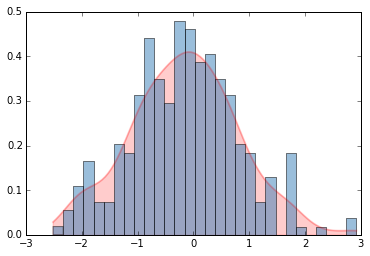

In [135]:
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
%matplotlib inline
x = np.random.randn(300)
density = stats.kde.gaussian_kde(x)
plt.hist(x, 30, normed=1, alpha=0.5, facecolor='#377EB8')
xd = np.linspace(min(x), max(x), 100)
plt.plot(xd, density(xd), lw=2, alpha=0.2,color='r') #line
plt.fill_between(xd, 0, density(xd), alpha=0.2, color='r')
plt.show()

## 如何在notebook中使用R


In [136]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [137]:
%%R
df = read.csv('iris.csv')
m = lm(Sepal_Length~Sepal_Width, data = df)
res = summary(m)
res$coefficients

              Estimate Std. Error   t value     Pr(>|t|)
(Intercept)  6.4812232  0.4812951 13.466214 1.726233e-27
Sepal_Width -0.2088703  0.1560406 -1.338564 1.827652e-01


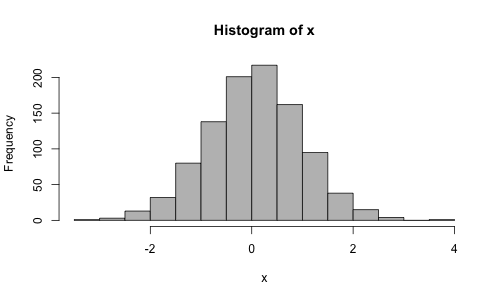

In [138]:
%%R -w 500 -h 300 
# 画图
x = rnorm(1000)
hist(x,c='gray')

**一个cell中的R代码默认不会和python输入输出**

In [139]:
%%R 
x = rnorm(100)

In [140]:
%%R
summary(x)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.99400 -0.81550 -0.24020 -0.09816  0.70310  2.88200 


**和python交互需要使用-i -o**

In [141]:
%%R -o x,y
x = rnorm(100)
y = rnorm(100)

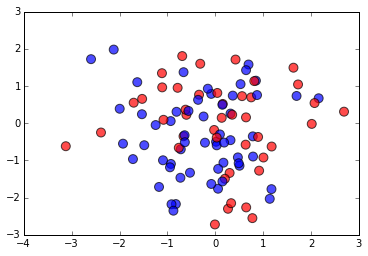

In [144]:
x = np.array(x)
y = np.array(y)
z = np.random.choice(['r','b'], size=100, replace=True)
plt.show(plt.scatter(x,y,s=80,c=z ,alpha=0.7))

In [145]:
import pandas as pd
df = pd.DataFrame({'x':x, 'y':y, 'z':z})
df.head()

,x,y,z
0,-0.824222,-2.173650,b
1,-1.929568,-0.550302,b
2,-0.915369,-2.179241,b
3,1.699432,0.732482,b
4,-0.215774,-0.523691,b


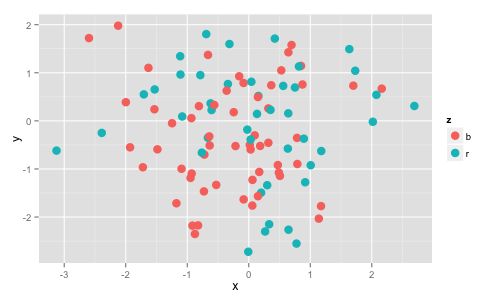

In [146]:
%%R -i df -w 500 -h 300 
library(ggplot2)
p = ggplot(df,aes(x = x, y = y, color = z)) + geom_point(size=4)
print(p)

**同一个cell中混编python和R代码**

In [147]:
%R -o coefs data(cars); model = lm(dist~speed, data=cars); coefs = model$coef 
coefs = np.array(coefs).round(2)
coefs

array([-17.58,   3.93])

**如何不需要%就可以使用notebook**

- http://jupyter.org/ 可以解析R语言的notebook
- http://blog.dominodatalab.com/r-notebooks/ 一种取巧的做法，仍是使用ipython notebook

## 一个整合R和python的例子
- python抓取网页，结合R的可视化

In [148]:
import requests
from bs4 import BeautifulSoup
import re
url = "http://movie.douban.com/top250"
r = requests.get(url)
soup_packtpage = BeautifulSoup(r.text)

In [149]:
def namefunc(movie):
    names = [x.findChild('span',attrs={'class':'title'}).string for x in movie]
    return names
def scorefunc(movie):
    scores = [float(str(x.findChild('em').string)) for x in movie]
    return scores
def numfunc(movie):
    num = [x.findChild('span',attrs=None).string for x in movie]
    num = [int(str(re.sub('\D', '', x))) for x in num]
    return num
url = "http://movie.douban.com/top250"
def getinfo(url):
    r = requests.get(url)
    soup_packtpage = BeautifulSoup(r.text)
    movie = soup_packtpage.findAll('div',attrs={'class':'info'})
    names = namefunc(movie)
    scores = scorefunc(movie)
    num = numfunc(movie)
    res = {'names': names, 'scores': scores, 'num': num}
    return res

In [150]:
urls = []
index = range(0,250,25)
for x in index:
    urls.append('http://movie.douban.com/top250?start='+str(x)+'&filter=&type=')
urls

['http://movie.douban.com/top250?start=0&filter=&type=',
 'http://movie.douban.com/top250?start=25&filter=&type=',
 'http://movie.douban.com/top250?start=50&filter=&type=',
 'http://movie.douban.com/top250?start=75&filter=&type=',
 'http://movie.douban.com/top250?start=100&filter=&type=',
 'http://movie.douban.com/top250?start=125&filter=&type=',
 'http://movie.douban.com/top250?start=150&filter=&type=',
 'http://movie.douban.com/top250?start=175&filter=&type=',
 'http://movie.douban.com/top250?start=200&filter=&type=',
 'http://movie.douban.com/top250?start=225&filter=&type=']

In [151]:
res = {'names': [], 'scores': [], 'num': []}
for url in urls:
    new = getinfo(url)
    res['names'].extend(new['names'])
    res['scores'].extend(new['scores'])
    res['num'].extend(new['num'])

In [158]:
import pandas as pd
df = pd.DataFrame(res)
df.head()

,names,num,scores
0,肖申克的救赎,573624,9.6
1,这个杀手不太冷,543630,9.4
2,阿甘正传,485031,9.4
3,霸王别姬,389513,9.4
4,美丽人生,265729,9.4


geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


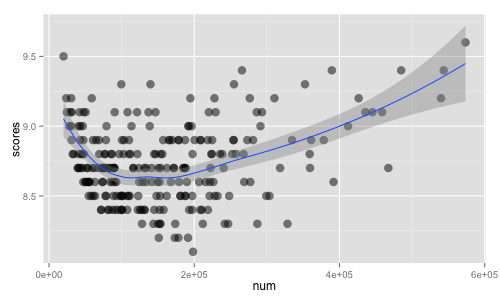

In [153]:
%%R -i df -w 500 -h 300 
library(ggplot2)
p = ggplot(df,aes(x = num, y = scores)) + geom_point(size=4,alpha=0.5) + stat_smooth()
print(p)

**Thank You!**

In [159]:
!ipython nbconvert r_and_python.ipynb --to slides --post serve

[NbConvertApp] Using existing profile dir: u'/Users/xiaokai/.ipython/profile_default'
[NbConvertApp] Converting notebook r_and_python.ipynb to slides
[NbConvertApp] Support files will be in r_and_python_files/
[NbConvertApp] Loaded template slides_reveal.tpl
/Users/xiaokai/anaconda/lib/python2.7/site-packages/IPython/nbconvert/filters/markdown.py:78: UserWarning: Node.js 0.9.12 or later wasn't found.
Nbconvert will try to use Pandoc instead.
  "Nbconvert will try to use Pandoc instead.")
[NbConvertApp] Writing 392322 bytes to r_and_python.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdn.jsdelivr.net/reveal.js/2.5.0
Serving your slides at http://127.0.0.1:8000/r_and_python.slides.html
Use Control-C to stop this server
^C
Interrupted

